In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('models/{}.bin'.format(year)))
    for year in range(1720, 1960, 20)
])

In [4]:
def cosine_series(anchor, query):
    
    return OrderedDict([
        (year, model.similarity(anchor, query))
        for year, model in models.items()
    ])

In [46]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [47]:
def plot_cosine_series(anchor, query):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    plt.ylim(0, 1)
    plt.title('{} :: {}'.format(anchor, query))
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.show()

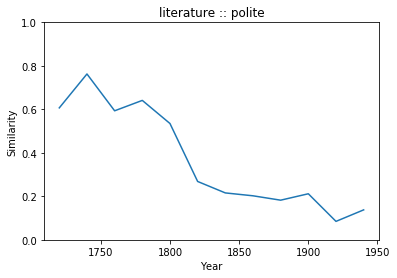

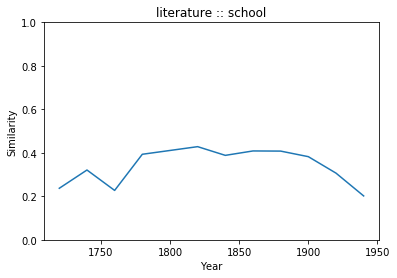

In [48]:
plot_cosine_series('literature', 'polite')
plot_cosine_series('literature', 'school')

In [49]:
poetry = cosine_series('literature', 'poetry')
lin_reg(poetry)

In [38]:
def neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [39]:
vocab = neighbor_vocab('literature')